In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    Ref_C = 1
    Ref_D = 0
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_C) and ECr < Ref_C:
            C = i
            Ref_C = Ec_HEx[i]
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_D) and ECr > Ref_D:
            D = i
            Ref_D = Ec_HEx[i]
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [93]:
def Radius(X): 
    R2,R3,B,L_m,L_r,h = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    #return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    A1 = ((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    #A2 = (B/((0.99497192*R2**1.55620764*R3**(-2.77937455))*np.exp(-0.92376442*(R3-R2)/L_m)*(h**0.08060702)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.1223844)
    A2 = (B/((1.71951251*R2**2.10853942*R3**(-3.7047729))*np.exp(-19.28562192/L_m)*(h**0.06469294)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.38270461)
    return(A2)

In [7]:
def MagField(X,a,b,c,d,e,f):
    R2,R3,R4,h,L,B_rem = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(h**f))

In [8]:
def MField(X,a,b,c,d,e):
    V_gap,V_mag,V_out,L,B_rem,R_4 = X
    return (a*(B_rem)*((V_gap/V_mag)**b)*(np.exp(c*R_4/L))*(np.tanh(d*(V_out/V_mag))+e))

In [9]:
def MField_2(X,a,b,c,d,e,f,g):
    R2,R3,R4,L,B_rem,R5 = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(np.tanh(f*(R5**2-R4**2)/(R4**2-R3**2))+g))

In [10]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    #return( 0.44774473*P1+0.69113695*P2-0.46543184*P3+0.02740828*P4-1.2412753 *P5)
    #return(0.271043*P1+0.49653155*P2-0.28565907*P3+1*P4-1.13502211*P5)
    return(0.66679759*P1+  0.8505155*P2 -0.6893551*P3 -0.94156247*P4-0.34938015*P5)

In [19]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    #return(0.46673225*P1+1.40322589*P2-0.49908018*P3+0.01575257*P4-0.68914607*P5)
    #return(0.36735687*P1+1*P2-0.38713269*P3+1*P4-0.21881993*P5)
    return(0.77855664*P1+ 1.44966907*P2 -0.80985607*P3+ 0.39133248*P4+  0.65808892*P5)

In [20]:
def W_m(X):
    P1,P2,P3 = X
    #a = 0.00541105
    #a = 0.00937193
    a = 2.89392107e-03
    
    #b = -2.21029128
    #b = -0.99809109
    b = -3.14070133e+00
    
    #c = 2.84461382
    #c = 4.33008264
    c = 3.20699560e+00
    
    #d = 2.85861479
    #d = 1.61088792
    d = 3.81307556e+00
    
    return(a*P1**b*P2**c*P3**d )

In [21]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [22]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [23]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_ma = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]


Calculation

In [637]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt,h_f):
    
    ##Properties of the solid 
    #rho_s = 7900  #[kg/m3] Density of the solid
    #k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    #rho_f = 1000  #[kg/m3] Density of the fluid
    #c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    #Pr_f  = 6.136 #[-] Prandtl of the fluid
    #mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    #k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    #d_p = 500*10**(-6) #[m] Particle diameter
   
    #Epsilon = 0.45 #0.55  #[-] Porosity
    #Epsilon_dp = 0.36 #0.465 #[-] Porosity
    d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
        
    #Magnetic Circuit
    #B_rem = 1.43
    #N_p = 2
    #N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    
    t_h = 4
    t_w = 2.5
    N_reg = 4/FE
    
    #Regenerador Quadrad
    R2 = [W/2+t_w]/np.tan(np.pi/N_reg)-t_h
    R3 = np.sqrt((W/2)**2 + (R2+t_h+H)**2)+t_h
    
   
    
    #R_aux = np.sqrt((R2+t_h)**2-(W/2)**2)
    #R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    
    #Regenerador Circular
    
    #R_med = (4/FE)/(2*np.pi)*(W + 2*t_w)
    #R2 = R_med-(H/2+t_h)
    #R3 = R_med+(H/2+t_h)
    
    #A_st = H*W
    #A_aux_st = ((2*np.pi/(4/FE)-4*t_w/(R2+R3))/2)*((R3-t_h)**2-(R2+t_h)**2)
    A_aux_st = (np.pi/(4/FE))*((R3-t_h)**2-(R2+t_h)**2) - 2*t_w*((R3-t_h)-(R2+t_h))
    A_st = A_aux_st[0]
    

    m_s   = L*A_st*10**-9*(1-Epsilon)*rho_s #mass of the AMR

    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*A_st*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon_dp)/Epsilon_dp)+((1-Epsilon_dp)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*A_st*10**(-9))/(m_f*c_f) 
    #print(Re_dp)
    #dP = (L/1000)*(150*(1-Epsilon_dp)**2*mu_f*v_s/(Epsilon_dp**3*d_p**2) + 1.75*(1-Epsilon_dp)*rho_f*v_s**2/(Epsilon_dp**3*d_p))
    
    dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    #k_e_f = k_f*Epsilon #Fluid effective conduction

    #a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    #f_0 = 0.8
    #k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    #D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    #k_s_eff = k_e_s
    #k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##
    Pi_4 = CdT_mg/CdT_dmg
    Pi_6 = ((m_f)*c_f)/(m_s*C_L*f)
    Pi_11 = ((m_f)*c_f)/(m_s*C_H*f)
    
    
    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    #Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_mag = m_s*f*CdT_dmg*W_m((Pi_6,Pi_4,Pi_11))
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    FL = (0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)
    
    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))*FL
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))*FL
    #print(Qc_reg,Qh_reg)
    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    

    R4 = Radius((R2,R3,B/B_rem,L*(1+L_xt),L,h_f))
    

    
    #print(m_s,f,CdT_dmg,((Pi_6,Pi_4,Pi_11)))
    

    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL)

In [808]:
H

array([25, 30, 35, 40])

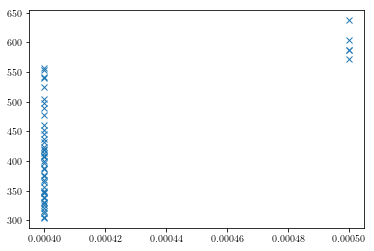

In [824]:
plt.plot(dp_p,m_p,'x')

In [814]:
m_f = np.arange(400,900,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1.5,2.6,0.5)
L = np.arange(100,121,10)
H = np.arange(25,41,5)
W = np.arange(35,51,5)
B_max = np.arange(1.3,1.43,0.05)
Tce = np.arange(14,17,4)
The = np.arange(43,47,4)
L_xt = np.arange(0.1,0.38,0.07)
d_par = np.arange(500*10**-6,501*10**-6,100*10**-6)
h_f = np.arange(10,26,5)
#d_par = [500*10**-6]

In [815]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)

13824

In [816]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 3100

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []
FL_target = []
dp_target = []
hf_target = []

##Properties of the solid 
rho_s = 7900  #[kg/m3] Density of the solid
k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

## Propertis of the fluid
rho_f = 1000  #[kg/m3] Density of the fluid
c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
Pr_f  = 6.136 #[-] Prandtl of the fluid
mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

## Porous medium


#Magnetic Circuit
B_rem = 1.43
N_p = 2
N_Rp = 2

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    for r in range(len(d_par)):
                                        for s in range(len(h_f)):
                                            it = 0
                                            Q_c_system = 0

                                            d_p = d_par[r] #[m] Particle diameter

                                            Epsilon = 0.36 #0.55  #[-] Porosity
                                            Epsilon_ep = 0.09
                                            Epsilon_dp = Epsilon - Epsilon_ep #0.36 #0.465 #[-] Porosity
                                            d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
                                            #h_f = 40

                                            while Q_c_system < Q_c_target and it < len(m_f):
                                                A,B,C,D,E,F,G,A1,A2,A3,A4 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q],h_f[s])
                                                Q_c_system = A[0]
                                                it = it + 1
                                                #print(A,B,C,D,E,F,G,A1,A2,A3)
                                                #print(m_f[it-1]*3600,Q_c_system )
                                            #print(it,Q_c_system)
                                            if Q_c_system > Q_c_target:
                                                Q_c.append(Q_c_system)
                                                m_f_target.append(3600*m_f[it-1])
                                                FE_target.append(FE[i])
                                                f_target.append(f[j])
                                                L_target.append(L[k])
                                                H_target.append(H[l])
                                                W_target.append(W[m])
                                                Tce_target.append(Tce[n])
                                                The_target.append(The[o])
                                                B_target.append(B_max[p])
                                                dp_target.append(d_p)
                                                hf_target.append(h_f[s])
                                                
                                                
                                                ECr_c.append(B[0])
                                                ECr_h.append(C[0])
                                                R4.append(D[0])
                                                R3.append(E[0])
                                                R2.append(F[0])
                                                W_mag.append(G)
                                                W_pump.append(A1)
                                                Q_h.append(A2[0])
                                                L_xt_target.append(A3)
                                                FL_target.append(A4)

                                            cont = cont+1
                                    print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)))


0.05787037037037037
0.11574074074074074
0.1736111111111111
0.23148148148148148
0.28935185185185186
0.3472222222222222
0.4050925925925926
0.46296296296296297
0.5208333333333334
0.5787037037037037
0.6365740740740741
0.6944444444444444
0.7523148148148148
0.8101851851851852
0.8680555555555556
0.9259259259259259
0.9837962962962963
1.0416666666666667
1.099537037037037
1.1574074074074074
1.2152777777777777
1.2731481481481481
1.3310185185185186
1.3888888888888888
1.4467592592592593
1.5046296296296295
1.5625
1.6203703703703705
1.6782407407407407
1.7361111111111112
1.7939814814814814
1.8518518518518519
1.9097222222222223
1.9675925925925926
2.025462962962963
2.0833333333333335
2.1412037037037037
2.199074074074074
2.2569444444444446
2.314814814814815
2.372685185185185
2.4305555555555554
2.488425925925926
2.5462962962962963
2.6041666666666665
2.662037037037037
2.7199074074074074
2.7777777777777777
2.8356481481481484
2.8935185185185186
2.951388888888889
3.009259259259259
3.0671296296296298
3.125
3.1

26.38888888888889
26.44675925925926
26.50462962962963
26.5625
26.62037037037037
26.67824074074074
26.73611111111111
26.79398148148148
26.85185185185185
26.90972222222222
26.96759259259259
27.025462962962962
27.083333333333332
27.141203703703702
27.199074074074073
27.256944444444443
27.314814814814813
27.372685185185187
27.430555555555557
27.488425925925927
27.546296296296298
27.604166666666668
27.662037037037038
27.71990740740741
27.77777777777778
27.83564814814815
27.89351851851852
27.95138888888889
28.00925925925926
28.06712962962963
28.125
28.18287037037037
28.24074074074074
28.29861111111111
28.35648148148148
28.41435185185185
28.47222222222222
28.53009259259259
28.587962962962962
28.645833333333332
28.703703703703702
28.761574074074073
28.819444444444443
28.877314814814813
28.935185185185187
28.993055555555557
29.050925925925927
29.108796296296298
29.166666666666668
29.224537037037038
29.28240740740741
29.34027777777778
29.39814814814815
29.45601851851852
29.51388888888889
29.5717

53.067129629629626
53.125
53.182870370370374
53.24074074074074
53.298611111111114
53.35648148148148
53.414351851851855
53.47222222222222
53.530092592592595
53.58796296296296
53.645833333333336
53.7037037037037
53.761574074074076
53.81944444444444
53.87731481481482
53.93518518518518
53.99305555555556
54.050925925925924
54.1087962962963
54.166666666666664
54.22453703703704
54.282407407407405
54.34027777777778
54.398148148148145
54.45601851851852
54.513888888888886
54.57175925925926
54.629629629629626
54.6875
54.745370370370374
54.80324074074074
54.861111111111114
54.91898148148148
54.976851851851855
55.03472222222222
55.092592592592595
55.15046296296296
55.208333333333336
55.2662037037037
55.324074074074076
55.38194444444444
55.43981481481482
55.49768518518518
55.55555555555556
55.613425925925924
55.6712962962963
55.729166666666664
55.78703703703704
55.844907407407405
55.90277777777778
55.960648148148145
56.01851851851852
56.076388888888886
56.13425925925926
56.192129629629626
56.25
56.3

79.97685185185185
80.03472222222223
80.0925925925926
80.15046296296296
80.20833333333333
80.26620370370371
80.32407407407408
80.38194444444444
80.43981481481481
80.49768518518519
80.55555555555556
80.61342592592592
80.67129629629629
80.72916666666667
80.78703703703704
80.8449074074074
80.90277777777777
80.96064814814815
81.01851851851852
81.07638888888889
81.13425925925925
81.19212962962963
81.25
81.30787037037037
81.36574074074075
81.42361111111111
81.48148148148148
81.53935185185185
81.59722222222223
81.6550925925926
81.71296296296296
81.77083333333333
81.82870370370371
81.88657407407408
81.94444444444444
82.00231481481481
82.06018518518519
82.11805555555556
82.17592592592592
82.23379629629629
82.29166666666667
82.34953703703704
82.4074074074074
82.46527777777777
82.52314814814815
82.58101851851852
82.63888888888889
82.69675925925925
82.75462962962963
82.8125
82.87037037037037
82.92824074074075
82.98611111111111
83.04398148148148
83.10185185185185
83.15972222222223
83.2175925925926
8

In [817]:
N_circ_cold = 6
N_circ_hot = 8

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    print(i/len(m_f_target)*100)
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

0.0
0.010204081632653062
0.020408163265306124
0.030612244897959183
0.04081632653061225
0.05102040816326531
0.061224489795918366
0.07142857142857142
0.0816326530612245
0.09183673469387754
0.10204081632653061
0.11224489795918367
0.12244897959183673
0.1326530612244898
0.14285714285714285
0.15306122448979592
0.163265306122449
0.17346938775510204
0.18367346938775508
0.19387755102040816
0.20408163265306123
0.2142857142857143
0.22448979591836735
0.2346938775510204
0.24489795918367346
0.25510204081632654
0.2653061224489796
0.2755102040816327
0.2857142857142857
0.29591836734693877
0.30612244897959184
0.3163265306122449
0.326530612244898
0.336734693877551
0.3469387755102041
0.35714285714285715
0.36734693877551017
0.3775510204081633
0.3877551020408163
0.3979591836734694
0.40816326530612246
0.4183673469387755
0.4285714285714286
0.4387755102040816
0.4489795918367347
0.4591836734693878
0.4693877551020408
0.4795918367346939
0.4897959183673469
0.5
0.5102040816326531
0.5204081632653061
0.53061224489795

4.795918367346939
4.8061224489795915
4.816326530612245
4.826530612244898
4.836734693877551
4.846938775510204
4.857142857142857
4.86734693877551
4.877551020408164
4.887755102040817
4.8979591836734695
4.908163265306122
4.918367346938775
4.928571428571429
4.938775510204082
4.948979591836735
4.959183673469387
4.969387755102041
4.979591836734694
4.9897959183673475
5.0
5.0102040816326525
5.020408163265306
5.030612244897959
5.040816326530613
5.051020408163265
5.061224489795919
5.071428571428571
5.081632653061225
5.091836734693878
5.1020408163265305
5.112244897959184
5.122448979591836
5.13265306122449
5.142857142857142
5.153061224489796
5.163265306122449
5.173469387755103
5.183673469387755
5.193877551020408
5.204081632653061
5.214285714285714
5.224489795918368
5.23469387755102
5.244897959183673
5.255102040816326
5.26530612244898
5.275510204081633
5.285714285714286
5.295918367346938
5.3061224489795915
5.316326530612245
5.326530612244898
5.336734693877551
5.346938775510204
5.357142857142857
5.36

9.683673469387754
9.693877551020408
9.704081632653061
9.714285714285714
9.724489795918368
9.73469387755102
9.744897959183675
9.755102040816327
9.76530612244898
9.775510204081634
9.785714285714285
9.795918367346939
9.806122448979592
9.816326530612244
9.826530612244898
9.83673469387755
9.846938775510203
9.857142857142858
9.86734693877551
9.877551020408164
9.887755102040817
9.89795918367347
9.908163265306122
9.918367346938775
9.928571428571429
9.938775510204081
9.948979591836734
9.959183673469388
9.96938775510204
9.979591836734695
9.989795918367347
10.0
10.010204081632654
10.020408163265305
10.03061224489796
10.040816326530612
10.051020408163264
10.061224489795919
10.071428571428571
10.081632653061225
10.091836734693878
10.10204081632653
10.112244897959185
10.122448979591837
10.13265306122449
10.142857142857142
10.153061224489795
10.16326530612245
10.173469387755102
10.183673469387756
10.193877551020408
10.204081632653061
10.214285714285715
10.224489795918368
10.23469387755102
10.24489795

14.438775510204083
14.448979591836736
14.45918367346939
14.469387755102039
14.479591836734693
14.489795918367346
14.499999999999998
14.510204081632653
14.520408163265305
14.53061224489796
14.540816326530612
14.551020408163264
14.561224489795919
14.571428571428571
14.581632653061224
14.591836734693878
14.60204081632653
14.612244897959185
14.622448979591837
14.63265306122449
14.642857142857144
14.653061224489797
14.66326530612245
14.673469387755103
14.683673469387756
14.69387755102041
14.70408163265306
14.714285714285714
14.724489795918366
14.73469387755102
14.744897959183673
14.755102040816325
14.76530612244898
14.775510204081632
14.785714285714285
14.795918367346939
14.806122448979592
14.816326530612244
14.826530612244898
14.83673469387755
14.846938775510205
14.857142857142858
14.86734693877551
14.877551020408164
14.887755102040817
14.897959183673471
14.908163265306124
14.918367346938776
14.92857142857143
14.93877551020408
14.948979591836734
14.959183673469386
14.96938775510204
14.9795

19.112244897959183
19.122448979591837
19.132653061224488
19.142857142857142
19.153061224489797
19.163265306122447
19.1734693877551
19.183673469387756
19.193877551020407
19.20408163265306
19.214285714285715
19.224489795918366
19.23469387755102
19.244897959183675
19.255102040816325
19.26530612244898
19.275510204081634
19.28571428571429
19.29591836734694
19.306122448979593
19.316326530612248
19.3265306122449
19.33673469387755
19.346938775510203
19.357142857142858
19.36734693877551
19.377551020408163
19.387755102040817
19.397959183673468
19.408163265306122
19.418367346938776
19.428571428571427
19.43877551020408
19.448979591836736
19.459183673469386
19.46938775510204
19.479591836734695
19.48979591836735
19.5
19.510204081632654
19.52040816326531
19.53061224489796
19.540816326530614
19.551020408163268
19.56122448979592
19.57142857142857
19.581632653061224
19.591836734693878
19.60204081632653
19.612244897959183
19.622448979591837
19.632653061224488
19.642857142857142
19.653061224489797
19.6632

23.918367346938776
23.92857142857143
23.93877551020408
23.948979591836736
23.959183673469386
23.96938775510204
23.97959183673469
23.989795918367346
24.0
24.01020408163265
24.020408163265305
24.03061224489796
24.04081632653061
24.051020408163264
24.06122448979592
24.071428571428573
24.081632653061224
24.091836734693878
24.102040816326532
24.112244897959183
24.122448979591837
24.13265306122449
24.142857142857142
24.153061224489797
24.16326530612245
24.1734693877551
24.183673469387756
24.193877551020407
24.20408163265306
24.21428571428571
24.224489795918366
24.23469387755102
24.24489795918367
24.255102040816325
24.26530612244898
24.275510204081634
24.285714285714285
24.29591836734694
24.306122448979593
24.316326530612244
24.3265306122449
24.336734693877553
24.346938775510203
24.357142857142858
24.367346938775512
24.377551020408163
24.387755102040817
24.39795918367347
24.408163265306122
24.418367346938776
24.428571428571427
24.43877551020408
24.448979591836732
24.459183673469386
24.4693877

28.755102040816325
28.76530612244898
28.775510204081634
28.78571428571429
28.79591836734694
28.806122448979593
28.816326530612248
28.8265306122449
28.836734693877553
28.846938775510207
28.857142857142858
28.867346938775512
28.877551020408166
28.887755102040817
28.89795918367347
28.908163265306126
28.91836734693878
28.92857142857143
28.938775510204078
28.948979591836732
28.959183673469386
28.969387755102037
28.97959183673469
28.989795918367346
28.999999999999996
29.01020408163265
29.020408163265305
29.03061224489796
29.04081632653061
29.051020408163264
29.06122448979592
29.07142857142857
29.081632653061224
29.091836734693878
29.10204081632653
29.112244897959183
29.122448979591837
29.132653061224488
29.142857142857142
29.153061224489797
29.163265306122447
29.1734693877551
29.183673469387756
29.193877551020407
29.20408163265306
29.214285714285715
29.22448979591837
29.23469387755102
29.244897959183675
29.25510204081633
29.26530612244898
29.275510204081634
29.28571428571429
29.2959183673469

33.38775510204081
33.39795918367347
33.40816326530612
33.41836734693878
33.42857142857143
33.43877551020408
33.44897959183674
33.45918367346939
33.46938775510204
33.4795918367347
33.48979591836735
33.5
33.51020408163266
33.52040816326531
33.53061224489796
33.54081632653062
33.55102040816327
33.56122448979592
33.57142857142857
33.58163265306122
33.59183673469388
33.60204081632653
33.61224489795918
33.62244897959184
33.63265306122449
33.64285714285714
33.6530612244898
33.66326530612245
33.6734693877551
33.683673469387756
33.69387755102041
33.70408163265306
33.714285714285715
33.724489795918366
33.73469387755102
33.744897959183675
33.755102040816325
33.765306122448976
33.775510204081634
33.785714285714285
33.795918367346935
33.80612244897959
33.816326530612244
33.826530612244895
33.83673469387755
33.8469387755102
33.85714285714286
33.86734693877551
33.87755102040816
33.88775510204082
33.89795918367347
33.90816326530612
33.91836734693878
33.92857142857143
33.93877551020408
33.9489795918367

38.316326530612244
38.326530612244895
38.33673469387755
38.3469387755102
38.357142857142854
38.36734693877551
38.37755102040816
38.38775510204081
38.39795918367347
38.40816326530612
38.41836734693877
38.42857142857143
38.43877551020408
38.44897959183673
38.45918367346939
38.46938775510204
38.47959183673469
38.48979591836735
38.5
38.51020408163265
38.52040816326531
38.53061224489796
38.54081632653062
38.55102040816327
38.56122448979592
38.57142857142858
38.58163265306123
38.59183673469388
38.602040816326536
38.61224489795919
38.62244897959184
38.632653061224495
38.642857142857146
38.6530612244898
38.66326530612245
38.6734693877551
38.683673469387756
38.69387755102041
38.70408163265306
38.714285714285715
38.724489795918366
38.73469387755102
38.744897959183675
38.755102040816325
38.765306122448976
38.775510204081634
38.785714285714285
38.795918367346935
38.80612244897959
38.816326530612244
38.826530612244895
38.83673469387755
38.8469387755102
38.857142857142854
38.86734693877551
38.877551

43.255102040816325
43.26530612244898
43.275510204081634
43.28571428571429
43.295918367346935
43.306122448979586
43.316326530612244
43.326530612244895
43.336734693877546
43.3469387755102
43.357142857142854
43.36734693877551
43.37755102040816
43.38775510204081
43.39795918367347
43.40816326530612
43.41836734693877
43.42857142857143
43.43877551020408
43.44897959183673
43.45918367346939
43.46938775510204
43.47959183673469
43.48979591836735
43.5
43.51020408163265
43.52040816326531
43.53061224489796
43.54081632653061
43.55102040816327
43.56122448979592
43.57142857142857
43.58163265306123
43.59183673469388
43.60204081632653
43.61224489795919
43.62244897959184
43.63265306122449
43.642857142857146
43.6530612244898
43.66326530612245
43.673469387755105
43.683673469387756
43.69387755102041
43.704081632653065
43.714285714285715
43.72448979591837
43.734693877551024
43.744897959183675
43.755102040816325
43.765306122448976
43.77551020408163
43.785714285714285
43.795918367346935
43.80612244897959
43.816

48.04081632653061
48.05102040816326
48.06122448979592
48.07142857142857
48.08163265306122
48.09183673469388
48.10204081632653
48.11224489795919
48.12244897959184
48.13265306122449
48.142857142857146
48.1530612244898
48.16326530612245
48.173469387755105
48.183673469387756
48.19387755102041
48.204081632653065
48.214285714285715
48.224489795918366
48.234693877551024
48.244897959183675
48.255102040816325
48.26530612244898
48.275510204081634
48.285714285714285
48.29591836734694
48.30612244897959
48.316326530612244
48.3265306122449
48.33673469387755
48.3469387755102
48.35714285714286
48.36734693877551
48.37755102040816
48.38775510204081
48.397959183673464
48.40816326530612
48.41836734693877
48.42857142857142
48.43877551020408
48.44897959183673
48.45918367346938
48.46938775510204
48.47959183673469
48.48979591836734
48.5
48.51020408163265
48.5204081632653
48.53061224489796
48.54081632653061
48.55102040816327
48.56122448979592
48.57142857142857
48.58163265306123
48.59183673469388
48.60204081632

52.846938775510196
52.85714285714286
52.867346938775505
52.87755102040816
52.88775510204081
52.89795918367347
52.908163265306115
52.91836734693878
52.92857142857142
52.93877551020408
52.94897959183673
52.95918367346939
52.96938775510204
52.9795918367347
52.98979591836734
53.0
53.01020408163265
53.02040816326531
53.03061224489796
53.04081632653062
53.05102040816326
53.06122448979592
53.07142857142857
53.08163265306123
53.09183673469388
53.102040816326536
53.11224489795918
53.12244897959184
53.13265306122449
53.142857142857146
53.1530612244898
53.163265306122454
53.1734693877551
53.18367346938776
53.19387755102041
53.204081632653065
53.214285714285715
53.22448979591837
53.234693877551024
53.24489795918367
53.255102040816325
53.265306122448976
53.275510204081634
53.28571428571428
53.29591836734694
53.306122448979586
53.316326530612244
53.326530612244895
53.33673469387755
53.346938775510196
53.35714285714286
53.367346938775505
53.37755102040816
53.38775510204081
53.39795918367347
53.408163

57.693877551020414
57.70408163265306
57.714285714285715
57.724489795918366
57.734693877551024
57.744897959183675
57.75510204081633
57.765306122448976
57.775510204081634
57.785714285714285
57.79591836734694
57.80612244897959
57.81632653061225
57.826530612244895
57.83673469387756
57.8469387755102
57.85714285714286
57.86734693877551
57.877551020408156
57.88775510204081
57.897959183673464
57.90816326530612
57.91836734693877
57.92857142857143
57.938775510204074
57.94897959183673
57.95918367346938
57.96938775510204
57.97959183673469
57.98979591836735
57.99999999999999
58.01020408163266
58.0204081632653
58.03061224489796
58.04081632653061
58.05102040816327
58.06122448979592
58.07142857142858
58.08163265306122
58.09183673469388
58.10204081632653
58.11224489795919
58.12244897959184
58.132653061224495
58.14285714285714
58.1530612244898
58.16326530612245
58.173469387755105
58.183673469387756
58.193877551020414
58.20408163265306
58.214285714285715
58.224489795918366
58.234693877551024
58.244897959

62.84693877551021
62.857142857142854
62.86734693877551
62.87755102040816
62.88775510204082
62.89795918367347
62.90816326530613
62.91836734693877
62.92857142857143
62.93877551020408
62.94897959183674
62.95918367346939
62.969387755102034
62.97959183673469
62.98979591836734
63.0
63.01020408163265
63.02040816326531
63.03061224489795
63.04081632653061
63.05102040816326
63.06122448979592
63.07142857142857
63.08163265306123
63.09183673469387
63.102040816326536
63.11224489795918
63.12244897959184
63.13265306122449
63.142857142857146
63.15306122448979
63.163265306122454
63.1734693877551
63.183673469387756
63.19387755102041
63.204081632653065
63.21428571428571
63.22448979591837
63.23469387755102
63.244897959183675
63.255102040816325
63.26530612244898
63.275510204081634
63.28571428571429
63.295918367346935
63.30612244897959
63.316326530612244
63.3265306122449
63.33673469387755
63.34693877551021
63.357142857142854
63.36734693877551
63.37755102040816
63.38775510204082
63.39795918367347
63.408163265

67.77551020408164
67.78571428571428
67.79591836734694
67.8061224489796
67.81632653061224
67.8265306122449
67.83673469387756
67.8469387755102
67.85714285714286
67.86734693877551
67.87755102040816
67.88775510204081
67.89795918367348
67.90816326530611
67.91836734693878
67.92857142857143
67.93877551020408
67.94897959183673
67.9591836734694
67.96938775510203
67.9795918367347
67.98979591836735
68.0
68.01020408163265
68.02040816326532
68.03061224489795
68.04081632653062
68.05102040816327
68.06122448979592
68.07142857142857
68.08163265306122
68.09183673469389
68.10204081632652
68.11224489795919
68.12244897959184
68.13265306122449
68.14285714285714
68.1530612244898
68.16326530612244
68.1734693877551
68.18367346938776
68.1938775510204
68.20408163265306
68.21428571428572
68.22448979591836
68.23469387755102
68.24489795918367
68.25510204081633
68.26530612244898
68.27551020408164
68.28571428571428
68.29591836734694
68.3061224489796
68.31632653061224
68.3265306122449
68.33673469387756
68.346938775510

72.55102040816327
72.56122448979592
72.57142857142857
72.58163265306122
72.59183673469389
72.60204081632654
72.61224489795919
72.62244897959184
72.63265306122449
72.64285714285714
72.6530612244898
72.66326530612245
72.6734693877551
72.68367346938776
72.6938775510204
72.70408163265306
72.71428571428571
72.72448979591837
72.73469387755101
72.74489795918367
72.75510204081633
72.76530612244898
72.77551020408163
72.78571428571429
72.79591836734693
72.8061224489796
72.81632653061224
72.8265306122449
72.83673469387755
72.84693877551021
72.85714285714285
72.86734693877551
72.87755102040816
72.88775510204081
72.89795918367346
72.90816326530613
72.91836734693877
72.92857142857143
72.93877551020408
72.94897959183673
72.95918367346938
72.96938775510205
72.9795918367347
72.98979591836735
73.0
73.01020408163265
73.0204081632653
73.03061224489797
73.04081632653062
73.05102040816327
73.06122448979592
73.07142857142857
73.08163265306122
73.09183673469389
73.10204081632654
73.11224489795919
73.122448979

77.44897959183673
77.45918367346938
77.46938775510203
77.4795918367347
77.48979591836735
77.5
77.51020408163265
77.5204081632653
77.53061224489795
77.54081632653062
77.55102040816327
77.56122448979592
77.57142857142857
77.58163265306123
77.59183673469387
77.60204081632654
77.61224489795919
77.62244897959184
77.63265306122449
77.64285714285715
77.65306122448979
77.66326530612245
77.6734693877551
77.68367346938776
77.6938775510204
77.70408163265307
77.71428571428571
77.72448979591837
77.73469387755102
77.74489795918367
77.75510204081633
77.76530612244899
77.77551020408163
77.78571428571428
77.79591836734694
77.8061224489796
77.81632653061224
77.8265306122449
77.83673469387755
77.8469387755102
77.85714285714286
77.86734693877551
77.87755102040816
77.88775510204081
77.89795918367346
77.90816326530611
77.91836734693878
77.92857142857143
77.93877551020408
77.94897959183673
77.9591836734694
77.96938775510203
77.9795918367347
77.98979591836735
78.0
78.01020408163265
78.02040816326532
78.030612

82.31632653061224
82.3265306122449
82.33673469387756
82.34693877551021
82.35714285714286
82.36734693877551
82.37755102040816
82.38775510204081
82.39795918367348
82.40816326530613
82.41836734693877
82.42857142857143
82.43877551020408
82.44897959183673
82.45918367346938
82.46938775510205
82.47959183673468
82.48979591836735
82.5
82.51020408163265
82.5204081632653
82.53061224489797
82.5408163265306
82.55102040816327
82.56122448979592
82.57142857142857
82.58163265306122
82.59183673469389
82.60204081632652
82.61224489795919
82.62244897959184
82.63265306122449
82.64285714285714
82.6530612244898
82.66326530612244
82.6734693877551
82.68367346938776
82.6938775510204
82.70408163265306
82.71428571428572
82.72448979591836
82.73469387755102
82.74489795918367
82.75510204081633
82.76530612244898
82.77551020408164
82.78571428571428
82.79591836734694
82.8061224489796
82.81632653061224
82.8265306122449
82.83673469387756
82.84693877551021
82.85714285714286
82.86734693877551
82.87755102040816
82.8877551020

87.12244897959184
87.13265306122449
87.14285714285714
87.15306122448979
87.16326530612245
87.17346938775509
87.18367346938776
87.1938775510204
87.20408163265306
87.21428571428571
87.22448979591837
87.23469387755102
87.24489795918367
87.25510204081633
87.26530612244898
87.27551020408163
87.28571428571429
87.29591836734694
87.3061224489796
87.31632653061224
87.3265306122449
87.33673469387755
87.34693877551021
87.35714285714286
87.36734693877551
87.37755102040816
87.38775510204081
87.39795918367346
87.40816326530613
87.41836734693878
87.42857142857143
87.43877551020408
87.44897959183675
87.45918367346938
87.46938775510205
87.4795918367347
87.48979591836735
87.5
87.51020408163265
87.5204081632653
87.53061224489795
87.54081632653062
87.55102040816325
87.56122448979592
87.57142857142857
87.58163265306122
87.59183673469387
87.60204081632654
87.61224489795919
87.62244897959184
87.63265306122449
87.64285714285714
87.65306122448979
87.66326530612245
87.6734693877551
87.68367346938776
87.69387755

91.94897959183673
91.9591836734694
91.96938775510203
91.9795918367347
91.98979591836735
92.0
92.01020408163265
92.02040816326532
92.03061224489795
92.04081632653062
92.05102040816327
92.06122448979592
92.07142857142857
92.08163265306123
92.09183673469387
92.10204081632654
92.11224489795919
92.12244897959184
92.13265306122449
92.14285714285714
92.15306122448979
92.16326530612244
92.1734693877551
92.18367346938776
92.1938775510204
92.20408163265306
92.21428571428572
92.22448979591836
92.23469387755102
92.24489795918367
92.25510204081633
92.26530612244898
92.27551020408164
92.28571428571428
92.29591836734694
92.3061224489796
92.31632653061224
92.3265306122449
92.33673469387756
92.3469387755102
92.35714285714286
92.36734693877551
92.37755102040816
92.38775510204081
92.39795918367348
92.40816326530611
92.41836734693878
92.42857142857143
92.43877551020408
92.44897959183673
92.4591836734694
92.46938775510203
92.4795918367347
92.48979591836735
92.5
92.51020408163265
92.52040816326532
92.530612

96.77551020408163
96.78571428571429
96.79591836734693
96.8061224489796
96.81632653061224
96.8265306122449
96.83673469387755
96.84693877551021
96.85714285714285
96.86734693877551
96.87755102040816
96.88775510204081
96.89795918367346
96.90816326530613
96.91836734693877
96.92857142857143
96.93877551020408
96.94897959183673
96.95918367346938
96.96938775510205
96.97959183673468
96.98979591836735
97.0
97.01020408163265
97.0204081632653
97.03061224489797
97.0408163265306
97.05102040816327
97.06122448979592
97.07142857142857
97.08163265306122
97.09183673469389
97.10204081632654
97.11224489795919
97.12244897959184
97.13265306122449
97.14285714285714
97.1530612244898
97.16326530612245
97.1734693877551
97.18367346938776
97.1938775510204
97.20408163265306
97.21428571428572
97.22448979591837
97.23469387755101
97.24489795918367
97.25510204081633
97.26530612244898
97.27551020408163
97.28571428571429
97.29591836734693
97.3061224489796
97.31632653061224
97.3265306122449
97.33673469387755
97.34693877551

In [818]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

In [819]:
t_h = 4
t_w = 2.5

m_La = (np.pi*((np.array(R3)-t_h)**2-(np.array(R2)+t_h)**2)- 2*t_w*((np.array(R3)-t_h)-(np.array(R2)+t_h)))*np.array(L_target)*(1-Epsilon)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+hf_target)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(Epsilon_dp)*1000*10**-9)

In [820]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

In [821]:
m_p = []
W_pa =[]

m_Nd_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []
dp_p = []

R2_p = []
R3_p = []
R4_p = []
hf_p = []
L_xt_p = []


for i in range(len(m_T)):
    print(i/len(m_T))
    A = 0
    for j in  range(len(m_T)):
        if (m_T[i] >= m_T[j] and W_T[i] > W_T[j]) or (m_T[i] > m_T[j] and W_T[i] >= W_T[j]):
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        dp_p.append(dp_target[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        hf_p.append(hf_target[i])
        #A = Optimal(m_f_target[i]/3600,FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        #print(A[0],m_f_target[i],FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

0.0
0.00010204081632653062
0.00020408163265306123
0.0003061224489795918
0.00040816326530612246
0.0005102040816326531
0.0006122448979591836
0.0007142857142857143
0.0008163265306122449
0.0009183673469387755
0.0010204081632653062
0.0011224489795918367
0.0012244897959183673
0.001326530612244898
0.0014285714285714286
0.001530612244897959
0.0016326530612244899
0.0017346938775510204
0.001836734693877551
0.0019387755102040817
0.0020408163265306124
0.002142857142857143
0.0022448979591836735
0.002346938775510204
0.0024489795918367346
0.002551020408163265
0.002653061224489796
0.0027551020408163266
0.002857142857142857
0.0029591836734693877
0.003061224489795918
0.003163265306122449
0.0032653061224489797
0.0033673469387755102
0.0034693877551020408
0.0035714285714285713
0.003673469387755102
0.003775510204081633
0.0038775510204081634
0.003979591836734694
0.004081632653061225
0.004183673469387755
0.004285714285714286
0.004387755102040816
0.004489795918367347
0.004591836734693878
0.004693877551020408
0

0.04326530612244898
0.04336734693877551
0.04346938775510204
0.04357142857142857
0.043673469387755105
0.04377551020408163
0.04387755102040816
0.043979591836734694
0.044081632653061226
0.04418367346938776
0.04428571428571428
0.044387755102040814
0.044489795918367346
0.04459183673469388
0.04469387755102041
0.04479591836734694
0.044897959183673466
0.045
0.04510204081632653
0.04520408163265306
0.045306122448979594
0.045408163265306126
0.04551020408163265
0.04561224489795918
0.045714285714285714
0.045816326530612246
0.04591836734693878
0.0460204081632653
0.046122448979591835
0.046224489795918366
0.0463265306122449
0.04642857142857143
0.04653061224489796
0.04663265306122449
0.04673469387755102
0.04683673469387755
0.04693877551020408
0.047040816326530614
0.047142857142857146
0.04724489795918367
0.0473469387755102
0.047448979591836735
0.047551020408163266
0.0476530612244898
0.04775510204081632
0.047857142857142855
0.04795918367346939
0.04806122448979592
0.04816326530612245
0.04826530612244898
0

0.08959183673469388
0.08969387755102042
0.08979591836734693
0.08989795918367346
0.09
0.09010204081632653
0.09020408163265306
0.09030612244897959
0.09040816326530612
0.09051020408163266
0.09061224489795919
0.09071428571428572
0.09081632653061225
0.09091836734693877
0.0910204081632653
0.09112244897959183
0.09122448979591836
0.0913265306122449
0.09142857142857143
0.09153061224489796
0.09163265306122449
0.09173469387755102
0.09183673469387756
0.09193877551020409
0.0920408163265306
0.09214285714285714
0.09224489795918367
0.0923469387755102
0.09244897959183673
0.09255102040816326
0.0926530612244898
0.09275510204081633
0.09285714285714286
0.09295918367346939
0.09306122448979592
0.09316326530612246
0.09326530612244897
0.0933673469387755
0.09346938775510204
0.09357142857142857
0.0936734693877551
0.09377551020408163
0.09387755102040816
0.0939795918367347
0.09408163265306123
0.09418367346938776
0.09428571428571429
0.09438775510204081
0.09448979591836734
0.09459183673469387
0.0946938775510204
0.09

0.1326530612244898
0.13275510204081634
0.13285714285714287
0.1329591836734694
0.13306122448979593
0.13316326530612244
0.13326530612244897
0.1333673469387755
0.13346938775510203
0.13357142857142856
0.1336734693877551
0.13377551020408163
0.13387755102040816
0.1339795918367347
0.13408163265306122
0.13418367346938775
0.13428571428571429
0.13438775510204082
0.13448979591836735
0.13459183673469388
0.1346938775510204
0.13479591836734695
0.13489795918367348
0.135
0.13510204081632654
0.13520408163265307
0.1353061224489796
0.13540816326530614
0.13551020408163264
0.13561224489795917
0.1357142857142857
0.13581632653061224
0.13591836734693877
0.1360204081632653
0.13612244897959183
0.13622448979591836
0.1363265306122449
0.13642857142857143
0.13653061224489796
0.1366326530612245
0.13673469387755102
0.13683673469387755
0.13693877551020409
0.13704081632653062
0.13714285714285715
0.13724489795918368
0.1373469387755102
0.13744897959183675
0.13755102040816328
0.1376530612244898
0.1377551020408163
0.137857

0.17785714285714285
0.17795918367346938
0.17806122448979592
0.17816326530612245
0.17826530612244898
0.1783673469387755
0.17846938775510204
0.17857142857142858
0.1786734693877551
0.17877551020408164
0.17887755102040817
0.1789795918367347
0.17908163265306123
0.17918367346938777
0.1792857142857143
0.17938775510204083
0.17948979591836733
0.17959183673469387
0.1796938775510204
0.17979591836734693
0.17989795918367346
0.18
0.18010204081632653
0.18020408163265306
0.1803061224489796
0.18040816326530612
0.18051020408163265
0.18061224489795918
0.18071428571428572
0.18081632653061225
0.18091836734693878
0.1810204081632653
0.18112244897959184
0.18122448979591838
0.1813265306122449
0.18142857142857144
0.18153061224489797
0.1816326530612245
0.181734693877551
0.18183673469387754
0.18193877551020407
0.1820408163265306
0.18214285714285713
0.18224489795918367
0.1823469387755102
0.18244897959183673
0.18255102040816326
0.1826530612244898
0.18275510204081633
0.18285714285714286
0.1829591836734694
0.18306122

0.22255102040816327
0.2226530612244898
0.22275510204081633
0.22285714285714286
0.2229591836734694
0.22306122448979593
0.22316326530612246
0.223265306122449
0.22336734693877552
0.22346938775510203
0.22357142857142856
0.2236734693877551
0.22377551020408162
0.22387755102040816
0.2239795918367347
0.22408163265306122
0.22418367346938775
0.22428571428571428
0.22438775510204081
0.22448979591836735
0.22459183673469388
0.2246938775510204
0.22479591836734694
0.22489795918367347
0.225
0.22510204081632654
0.22520408163265307
0.2253061224489796
0.22540816326530613
0.22551020408163266
0.2256122448979592
0.2257142857142857
0.22581632653061223
0.22591836734693876
0.2260204081632653
0.22612244897959183
0.22622448979591836
0.2263265306122449
0.22642857142857142
0.22653061224489796
0.2266326530612245
0.22673469387755102
0.22683673469387755
0.22693877551020408
0.22704081632653061
0.22714285714285715
0.22724489795918368
0.2273469387755102
0.22744897959183674
0.22755102040816327
0.2276530612244898
0.2277551

0.2676530612244898
0.2677551020408163
0.26785714285714285
0.2679591836734694
0.2680612244897959
0.26816326530612244
0.268265306122449
0.2683673469387755
0.26846938775510204
0.26857142857142857
0.2686734693877551
0.26877551020408164
0.26887755102040817
0.2689795918367347
0.26908163265306123
0.26918367346938776
0.2692857142857143
0.2693877551020408
0.26948979591836736
0.2695918367346939
0.2696938775510204
0.26979591836734695
0.2698979591836735
0.27
0.27010204081632655
0.2702040816326531
0.2703061224489796
0.27040816326530615
0.2705102040816327
0.2706122448979592
0.27071428571428574
0.2708163265306123
0.27091836734693875
0.2710204081632653
0.2711224489795918
0.27122448979591834
0.2713265306122449
0.2714285714285714
0.27153061224489794
0.27163265306122447
0.271734693877551
0.27183673469387754
0.27193877551020407
0.2720408163265306
0.27214285714285713
0.27224489795918366
0.2723469387755102
0.2724489795918367
0.27255102040816326
0.2726530612244898
0.2727551020408163
0.27285714285714285
0.272

0.3127551020408163
0.31285714285714283
0.31295918367346937
0.3130612244897959
0.31316326530612243
0.31326530612244896
0.3133673469387755
0.313469387755102
0.31357142857142856
0.3136734693877551
0.3137755102040816
0.31387755102040815
0.3139795918367347
0.3140816326530612
0.31418367346938775
0.3142857142857143
0.3143877551020408
0.31448979591836734
0.3145918367346939
0.3146938775510204
0.31479591836734694
0.31489795918367347
0.315
0.31510204081632653
0.31520408163265307
0.3153061224489796
0.31540816326530613
0.31551020408163266
0.3156122448979592
0.3157142857142857
0.31581632653061226
0.3159183673469388
0.3160204081632653
0.31612244897959185
0.3162244897959184
0.3163265306122449
0.31642857142857145
0.316530612244898
0.3166326530612245
0.31673469387755104
0.3168367346938776
0.3169387755102041
0.31704081632653064
0.3171428571428571
0.31724489795918365
0.3173469387755102
0.3174489795918367
0.31755102040816324
0.3176530612244898
0.3177551020408163
0.31785714285714284
0.31795918367346937
0.31

0.3576530612244898
0.35775510204081634
0.3578571428571429
0.3579591836734694
0.35806122448979594
0.35816326530612247
0.358265306122449
0.35836734693877553
0.35846938775510206
0.3585714285714286
0.35867346938775513
0.35877551020408166
0.35887755102040814
0.35897959183673467
0.3590816326530612
0.35918367346938773
0.35928571428571426
0.3593877551020408
0.3594897959183673
0.35959183673469386
0.3596938775510204
0.3597959183673469
0.35989795918367345
0.36
0.3601020408163265
0.36020408163265305
0.3603061224489796
0.3604081632653061
0.36051020408163265
0.3606122448979592
0.3607142857142857
0.36081632653061224
0.3609183673469388
0.3610204081632653
0.36112244897959184
0.36122448979591837
0.3613265306122449
0.36142857142857143
0.36153061224489796
0.3616326530612245
0.36173469387755103
0.36183673469387756
0.3619387755102041
0.3620408163265306
0.36214285714285716
0.3622448979591837
0.3623469387755102
0.36244897959183675
0.3625510204081633
0.3626530612244898
0.36275510204081635
0.3628571428571429
0.

0.4035714285714286
0.4036734693877551
0.40377551020408164
0.4038775510204082
0.4039795918367347
0.40408163265306124
0.40418367346938777
0.4042857142857143
0.40438775510204084
0.40448979591836737
0.4045918367346939
0.40469387755102043
0.40479591836734696
0.4048979591836735
0.405
0.4051020408163265
0.40520408163265303
0.40530612244897957
0.4054081632653061
0.40551020408163263
0.40561224489795916
0.4057142857142857
0.4058163265306122
0.40591836734693876
0.4060204081632653
0.4061224489795918
0.40622448979591835
0.4063265306122449
0.4064285714285714
0.40653061224489795
0.4066326530612245
0.406734693877551
0.40683673469387754
0.4069387755102041
0.4070408163265306
0.40714285714285714
0.40724489795918367
0.4073469387755102
0.40744897959183674
0.40755102040816327
0.4076530612244898
0.40775510204081633
0.40785714285714286
0.4079591836734694
0.4080612244897959
0.40816326530612246
0.408265306122449
0.4083673469387755
0.40846938775510205
0.4085714285714286
0.4086734693877551
0.40877551020408165
0.4

0.4486734693877551
0.44877551020408163
0.44887755102040816
0.4489795918367347
0.4490816326530612
0.44918367346938776
0.4492857142857143
0.4493877551020408
0.44948979591836735
0.4495918367346939
0.4496938775510204
0.44979591836734695
0.4498979591836735
0.45
0.45010204081632654
0.4502040816326531
0.4503061224489796
0.45040816326530614
0.45051020408163267
0.4506122448979592
0.45071428571428573
0.45081632653061227
0.4509183673469388
0.45102040816326533
0.45112244897959186
0.4512244897959184
0.4513265306122449
0.4514285714285714
0.45153061224489793
0.45163265306122446
0.451734693877551
0.45183673469387753
0.45193877551020406
0.4520408163265306
0.4521428571428571
0.45224489795918366
0.4523469387755102
0.4524489795918367
0.45255102040816325
0.4526530612244898
0.4527551020408163
0.45285714285714285
0.4529591836734694
0.4530612244897959
0.45316326530612244
0.453265306122449
0.4533673469387755
0.45346938775510204
0.45357142857142857
0.4536734693877551
0.45377551020408163
0.45387755102040817
0.45

0.4930612244897959
0.4931632653061224
0.49326530612244895
0.4933673469387755
0.493469387755102
0.49357142857142855
0.4936734693877551
0.4937755102040816
0.49387755102040815
0.4939795918367347
0.4940816326530612
0.49418367346938774
0.4942857142857143
0.4943877551020408
0.49448979591836734
0.49459183673469387
0.4946938775510204
0.49479591836734693
0.49489795918367346
0.495
0.4951020408163265
0.49520408163265306
0.4953061224489796
0.4954081632653061
0.49551020408163265
0.4956122448979592
0.4957142857142857
0.49581632653061225
0.4959183673469388
0.4960204081632653
0.49612244897959185
0.4962244897959184
0.4963265306122449
0.49642857142857144
0.496530612244898
0.4966326530612245
0.49673469387755104
0.49683673469387757
0.4969387755102041
0.49704081632653063
0.49714285714285716
0.4972448979591837
0.49734693877551023
0.49744897959183676
0.4975510204081633
0.4976530612244898
0.4977551020408163
0.49785714285714283
0.49795918367346936
0.4980612244897959
0.4981632653061224
0.49826530612244896
0.498

0.538469387755102
0.5385714285714286
0.5386734693877551
0.5387755102040817
0.5388775510204081
0.5389795918367347
0.5390816326530612
0.5391836734693878
0.5392857142857143
0.5393877551020408
0.5394897959183673
0.5395918367346939
0.5396938775510204
0.539795918367347
0.5398979591836734
0.54
0.5401020408163265
0.5402040816326531
0.5403061224489796
0.5404081632653062
0.5405102040816326
0.5406122448979592
0.5407142857142857
0.5408163265306123
0.5409183673469388
0.5410204081632654
0.5411224489795918
0.5412244897959184
0.5413265306122449
0.5414285714285715
0.541530612244898
0.5416326530612245
0.541734693877551
0.5418367346938775
0.5419387755102041
0.5420408163265306
0.5421428571428571
0.5422448979591836
0.5423469387755102
0.5424489795918367
0.5425510204081633
0.5426530612244898
0.5427551020408163
0.5428571428571428
0.5429591836734694
0.5430612244897959
0.5431632653061225
0.5432653061224489
0.5433673469387755
0.543469387755102
0.5435714285714286
0.5436734693877551
0.5437755102040817
0.5438775510

0.5838775510204082
0.5839795918367346
0.5840816326530612
0.5841836734693877
0.5842857142857143
0.5843877551020408
0.5844897959183674
0.5845918367346938
0.5846938775510204
0.5847959183673469
0.5848979591836735
0.585
0.5851020408163266
0.585204081632653
0.5853061224489796
0.5854081632653061
0.5855102040816327
0.5856122448979592
0.5857142857142857
0.5858163265306122
0.5859183673469388
0.5860204081632653
0.5861224489795919
0.5862244897959183
0.5863265306122449
0.5864285714285714
0.586530612244898
0.5866326530612245
0.5867346938775511
0.5868367346938775
0.5869387755102041
0.5870408163265306
0.5871428571428572
0.5872448979591837
0.5873469387755103
0.5874489795918367
0.5875510204081633
0.5876530612244898
0.5877551020408164
0.5878571428571429
0.5879591836734694
0.5880612244897959
0.5881632653061224
0.588265306122449
0.5883673469387755
0.588469387755102
0.5885714285714285
0.5886734693877551
0.5887755102040816
0.5888775510204082
0.5889795918367347
0.5890816326530612
0.5891836734693877
0.58928571

0.6310204081632653
0.6311224489795918
0.6312244897959184
0.6313265306122449
0.6314285714285715
0.6315306122448979
0.6316326530612245
0.631734693877551
0.6318367346938776
0.631938775510204
0.6320408163265306
0.6321428571428571
0.6322448979591837
0.6323469387755102
0.6324489795918368
0.6325510204081632
0.6326530612244898
0.6327551020408163
0.6328571428571429
0.6329591836734694
0.633061224489796
0.6331632653061224
0.633265306122449
0.6333673469387755
0.6334693877551021
0.6335714285714286
0.6336734693877552
0.6337755102040816
0.6338775510204082
0.6339795918367347
0.6340816326530613
0.6341836734693878
0.6342857142857142
0.6343877551020408
0.6344897959183673
0.6345918367346939
0.6346938775510204
0.634795918367347
0.6348979591836734
0.635
0.6351020408163265
0.6352040816326531
0.6353061224489795
0.6354081632653061
0.6355102040816326
0.6356122448979592
0.6357142857142857
0.6358163265306123
0.6359183673469387
0.6360204081632653
0.6361224489795918
0.6362244897959184
0.6363265306122449
0.636428571

0.676734693877551
0.6768367346938775
0.6769387755102041
0.6770408163265306
0.6771428571428572
0.6772448979591836
0.6773469387755102
0.6774489795918367
0.6775510204081633
0.6776530612244898
0.6777551020408163
0.6778571428571428
0.6779591836734694
0.6780612244897959
0.6781632653061225
0.678265306122449
0.6783673469387755
0.678469387755102
0.6785714285714286
0.6786734693877551
0.6787755102040817
0.6788775510204081
0.6789795918367347
0.6790816326530612
0.6791836734693878
0.6792857142857143
0.6793877551020409
0.6794897959183673
0.6795918367346939
0.6796938775510204
0.679795918367347
0.6798979591836735
0.68
0.6801020408163265
0.6802040816326531
0.6803061224489796
0.6804081632653062
0.6805102040816327
0.6806122448979591
0.6807142857142857
0.6808163265306122
0.6809183673469388
0.6810204081632653
0.6811224489795918
0.6812244897959183
0.6813265306122449
0.6814285714285714
0.681530612244898
0.6816326530612244
0.681734693877551
0.6818367346938775
0.6819387755102041
0.6820408163265306
0.68214285714

0.7246938775510204
0.7247959183673469
0.7248979591836735
0.725
0.7251020408163266
0.725204081632653
0.7253061224489796
0.7254081632653061
0.7255102040816327
0.7256122448979592
0.7257142857142858
0.7258163265306122
0.7259183673469388
0.7260204081632653
0.7261224489795919
0.7262244897959184
0.726326530612245
0.7264285714285714
0.726530612244898
0.7266326530612245
0.7267346938775511
0.7268367346938776
0.726938775510204
0.7270408163265306
0.7271428571428571
0.7272448979591837
0.7273469387755102
0.7274489795918367
0.7275510204081632
0.7276530612244898
0.7277551020408163
0.7278571428571429
0.7279591836734693
0.7280612244897959
0.7281632653061224
0.728265306122449
0.7283673469387755
0.7284693877551021
0.7285714285714285
0.7286734693877551
0.7287755102040816
0.7288775510204082
0.7289795918367347
0.7290816326530613
0.7291836734693877
0.7292857142857143
0.7293877551020408
0.7294897959183674
0.7295918367346939
0.7296938775510204
0.7297959183673469
0.7298979591836735
0.73
0.7301020408163266
0.7302

0.7727551020408163
0.7728571428571429
0.7729591836734694
0.773061224489796
0.7731632653061224
0.7732653061224489
0.7733673469387755
0.773469387755102
0.7735714285714286
0.773673469387755
0.7737755102040816
0.7738775510204081
0.7739795918367347
0.7740816326530612
0.7741836734693878
0.7742857142857142
0.7743877551020408
0.7744897959183673
0.7745918367346939
0.7746938775510204
0.774795918367347
0.7748979591836734
0.775
0.7751020408163265
0.7752040816326531
0.7753061224489796
0.7754081632653061
0.7755102040816326
0.7756122448979592
0.7757142857142857
0.7758163265306123
0.7759183673469388
0.7760204081632653
0.7761224489795918
0.7762244897959184
0.7763265306122449
0.7764285714285715
0.7765306122448979
0.7766326530612245
0.776734693877551
0.7768367346938776
0.7769387755102041
0.7770408163265307
0.7771428571428571
0.7772448979591837
0.7773469387755102
0.7774489795918368
0.7775510204081633
0.7776530612244898
0.7777551020408163
0.7778571428571428
0.7779591836734694
0.7780612244897959
0.778163265

0.8206122448979591
0.8207142857142857
0.8208163265306122
0.8209183673469388
0.8210204081632653
0.8211224489795919
0.8212244897959183
0.8213265306122449
0.8214285714285714
0.821530612244898
0.8216326530612245
0.821734693877551
0.8218367346938775
0.8219387755102041
0.8220408163265306
0.8221428571428572
0.8222448979591837
0.8223469387755102
0.8224489795918367
0.8225510204081633
0.8226530612244898
0.8227551020408164
0.8228571428571428
0.8229591836734694
0.8230612244897959
0.8231632653061225
0.823265306122449
0.8233673469387756
0.823469387755102
0.8235714285714286
0.8236734693877551
0.8237755102040817
0.8238775510204082
0.8239795918367347
0.8240816326530612
0.8241836734693877
0.8242857142857143
0.8243877551020408
0.8244897959183674
0.8245918367346938
0.8246938775510204
0.8247959183673469
0.8248979591836735
0.825
0.8251020408163265
0.825204081632653
0.8253061224489796
0.8254081632653061
0.8255102040816327
0.8256122448979591
0.8257142857142857
0.8258163265306122
0.8259183673469388
0.826020408

0.8684693877551021
0.8685714285714285
0.8686734693877551
0.8687755102040816
0.8688775510204082
0.8689795918367347
0.8690816326530613
0.8691836734693877
0.8692857142857143
0.8693877551020408
0.8694897959183674
0.8695918367346939
0.8696938775510205
0.8697959183673469
0.8698979591836735
0.87
0.8701020408163266
0.8702040816326531
0.8703061224489796
0.8704081632653061
0.8705102040816326
0.8706122448979592
0.8707142857142857
0.8708163265306123
0.8709183673469387
0.8710204081632653
0.8711224489795918
0.8712244897959184
0.8713265306122449
0.8714285714285714
0.8715306122448979
0.8716326530612245
0.871734693877551
0.8718367346938776
0.871938775510204
0.8720408163265306
0.8721428571428571
0.8722448979591837
0.8723469387755102
0.8724489795918368
0.8725510204081632
0.8726530612244898
0.8727551020408163
0.8728571428571429
0.8729591836734694
0.873061224489796
0.8731632653061224
0.873265306122449
0.8733673469387755
0.8734693877551021
0.8735714285714286
0.8736734693877551
0.8737755102040816
0.873877551

0.913469387755102
0.9135714285714286
0.9136734693877551
0.9137755102040817
0.9138775510204081
0.9139795918367347
0.9140816326530612
0.9141836734693878
0.9142857142857143
0.9143877551020408
0.9144897959183673
0.9145918367346939
0.9146938775510204
0.914795918367347
0.9148979591836734
0.915
0.9151020408163265
0.9152040816326531
0.9153061224489796
0.9154081632653062
0.9155102040816326
0.9156122448979592
0.9157142857142857
0.9158163265306123
0.9159183673469388
0.9160204081632654
0.9161224489795918
0.9162244897959184
0.9163265306122449
0.9164285714285715
0.916530612244898
0.9166326530612245
0.916734693877551
0.9168367346938775
0.9169387755102041
0.9170408163265306
0.9171428571428571
0.9172448979591836
0.9173469387755102
0.9174489795918367
0.9175510204081633
0.9176530612244898
0.9177551020408163
0.9178571428571428
0.9179591836734694
0.9180612244897959
0.9181632653061225
0.9182653061224489
0.9183673469387755
0.918469387755102
0.9185714285714286
0.9186734693877551
0.9187755102040817
0.918877551

0.9589795918367346
0.9590816326530612
0.9591836734693877
0.9592857142857143
0.9593877551020408
0.9594897959183674
0.9595918367346938
0.9596938775510204
0.9597959183673469
0.9598979591836735
0.96
0.9601020408163266
0.960204081632653
0.9603061224489796
0.9604081632653061
0.9605102040816327
0.9606122448979592
0.9607142857142857
0.9608163265306122
0.9609183673469388
0.9610204081632653
0.9611224489795919
0.9612244897959183
0.9613265306122449
0.9614285714285714
0.961530612244898
0.9616326530612245
0.9617346938775511
0.9618367346938775
0.9619387755102041
0.9620408163265306
0.9621428571428572
0.9622448979591837
0.9623469387755103
0.9624489795918367
0.9625510204081633
0.9626530612244898
0.9627551020408164
0.9628571428571429
0.9629591836734694
0.9630612244897959
0.9631632653061224
0.963265306122449
0.9633673469387755
0.963469387755102
0.9635714285714285
0.9636734693877551
0.9637755102040816
0.9638775510204082
0.9639795918367347
0.9640816326530612
0.9641836734693877
0.9642857142857143
0.964387755

In [822]:
workbook = xlsxwriter.Workbook('Optimization_2.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    Data.write(i,23,L_xt_p[i])
    Data.write(i,24,hf_p[i])
    
workbook.close()

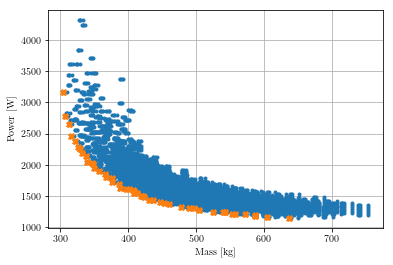

In [823]:
plt.plot(m_T,W_T,'.')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('Optimum_red_2Hz.png',format = 'png', dpi=500,bbox_inches='tight')

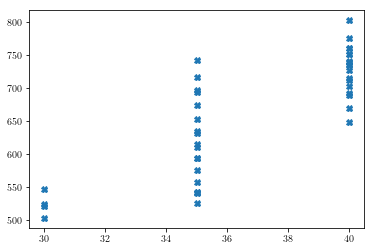

In [774]:
#plt.plot(m_T,m_La,'.')
plt.plot(H_p,m_p,'X')

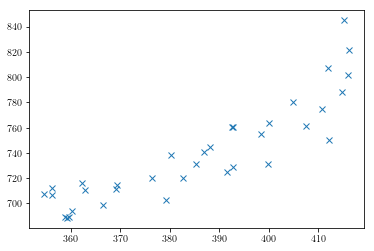

In [636]:
plt.plot(R4_p,m_p,'x')

In [715]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i]+5,1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i],hf_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

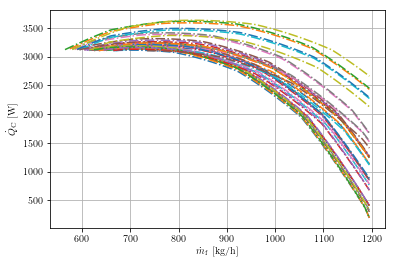

In [716]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i],'-.')
#plt.ylim(2900,4700)
plt.grid()
#plt.legend()
plt.xlabel(r'$\dot{m}_\mathrm{f}$ [kg/h]')
plt.ylabel(r'$\dot{Q}_\mathrm{C}$ [W]')
plt.savefig('Extra.png',format = 'png', dpi=1000,bbox_inches='tight')

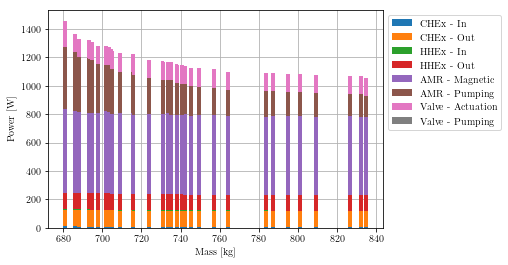

In [717]:
width = 2
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [722]:
m_La_p = np.pi*(np.array(R3_p)**2-np.array(R2_p)**2)*np.array(L_p)*(1-Epsilon)*7000*10**-9
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500
m_Fe_p = np.pi*((np.array(R4_p)+np.array(hf_p))**2-np.array(R4_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 


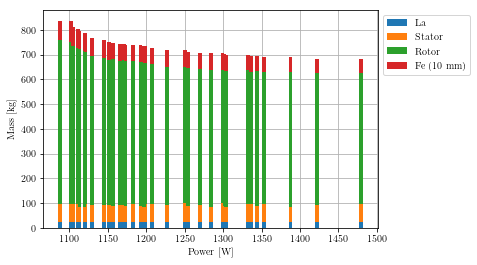

In [723]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')